# Only creates the profile in the cwd

In [ ]:
#!/usr/bin/env python3
"""Barrel piston profile - Wide Legend."""

import os
import numpy as np
import matplotlib.pyplot as plt

SCRIPT_DIR = os.getcwd()

def calculate_barrel_profile(R_P, l_s_P, R_nominal, l_KG, num_points=500):
    midpoint = l_KG / 2.0
    peak_x = midpoint + l_s_P

    d_crown = np.abs(l_KG - peak_x)
    d_skirt = np.abs(0.0 - peak_x)

    max_d = max(d_crown, d_skirt)
    if R_P <= max_d:
        raise ValueError(f"R_P ({R_P}) must be > largest axial distance from peak ({max_d:.3f})")

    delta_C_P = R_P - np.sqrt(R_P**2 - d_crown**2)
    delta_DC_P = R_P - np.sqrt(R_P**2 - d_skirt**2)

    x = np.linspace(0.0, l_KG, num_points)
    d = np.abs(x - peak_x)
    
    if np.any(d >= R_P):
        raise ValueError("Profile points exist outside the spherical cap.")
        
    delta = R_P - np.sqrt(R_P**2 - d**2)
    y = -delta

    return x, y, delta_C_P, delta_DC_P, peak_x

def plot_profile(x, y, delta_C_P, delta_DC_P, l_s_P, l_KG, R_P, peak_x, name, save_path=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    midpoint = l_KG / 2.0
    
    # Reference Lines
    ax.axvline(midpoint, color='black', linestyle='--', linewidth=1.5, alpha=0.7, 
               label=f'Center ($x={midpoint:.2f}$)')
    ax.axvline(peak_x, color='magenta', linestyle='-.', linewidth=1.5, alpha=0.8, 
               label=f'Peak ($l_{{s,P}}={l_s_P}$)')

    # Main Profile
    ax.plot(x, y, linewidth=2.5, color='tab:blue', label='Barrel Profile')
    ax.axhline(0, linestyle='-', color='gray', linewidth=0.8, alpha=0.5)

    # Markers
    ax.plot(l_KG, -delta_C_P, 'gs', zorder=5, markersize=8,
            label=f'Top End\n$\delta_{{C,P}}={delta_C_P:.3f}$ mm')
    ax.plot(0, -delta_DC_P, 'ro', zorder=5, markersize=8,
            label=f'Bottom End\n$\delta_{{DC,P}}={delta_DC_P:.3f}$ mm')

    # Styling
    ax.set_xlabel('Axial Position $x$ (mm)', fontsize=11)
    ax.set_ylabel('Radial Deviation (mm)', fontsize=11)
    ax.set_title(f'{name}\n$R_P$={R_P:.1f} mm, $l_{{s,P}}$={l_s_P:.3f} mm', fontsize=12)
    
    ax.grid(True, which='major', linestyle='-', alpha=0.4)
    ax.minorticks_on()
    ax.grid(True, which='minor', linestyle=':', alpha=0.2)
    
    # --- Wide Legend Configuration ---
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
              ncol=5, fontsize=9, frameon=True, fancybox=True, shadow=True)
    
    plt.tight_layout()
    # Adjust bottom margin to accommodate the new wide legend
    plt.subplots_adjust(bottom=0.2)
    
    if save_path:
        plt.savefig(save_path, dpi=200, bbox_inches='tight')
        print(f"Plot saved: {save_path}")
    plt.show()
    plt.close(fig)

def generate_profile(R_P, l_s_P, R_nominal, l_KG, name, num_points=500):
    try:
        x, y, dCP, dDCP, px = calculate_barrel_profile(R_P, l_s_P, R_nominal, l_KG, num_points)
        
        out_txt = os.path.join(SCRIPT_DIR, f"{name}.txt")
        np.savetxt(out_txt, np.column_stack([x, y]), fmt="%.6f", delimiter="\t")
        
        out_png = os.path.join(SCRIPT_DIR, f"{name}.png")
        plot_profile(x, y, dCP, dDCP, l_s_P, l_KG, R_P, px, name, out_png)
        
        return {"name": name, "delta_C_P": dCP, "delta_DC_P": dDCP}
    except ValueError as e:
        print(f"Error generating {name}: {e}")
        return None

if __name__ == "__main__":
    R_P_list = (30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 300, 400)
    l_s_P_list = (3, 1.5, 0)
    R_nominal = 29.0 / 2
    l_KG = 75.753

    for Rp in R_P_list:
        for lsp in l_s_P_list:
            pname = f"piston_macro_Rp_{Rp}_ls_p_{lsp}"
            print(f"--- Generating {pname} ---")
            generate_profile(Rp, lsp, R_nominal, l_KG, pname)


# All at once

C:\Users\RReddy\AppData\Local\Temp\ipykernel_24120\2379508222.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(R_P_list))


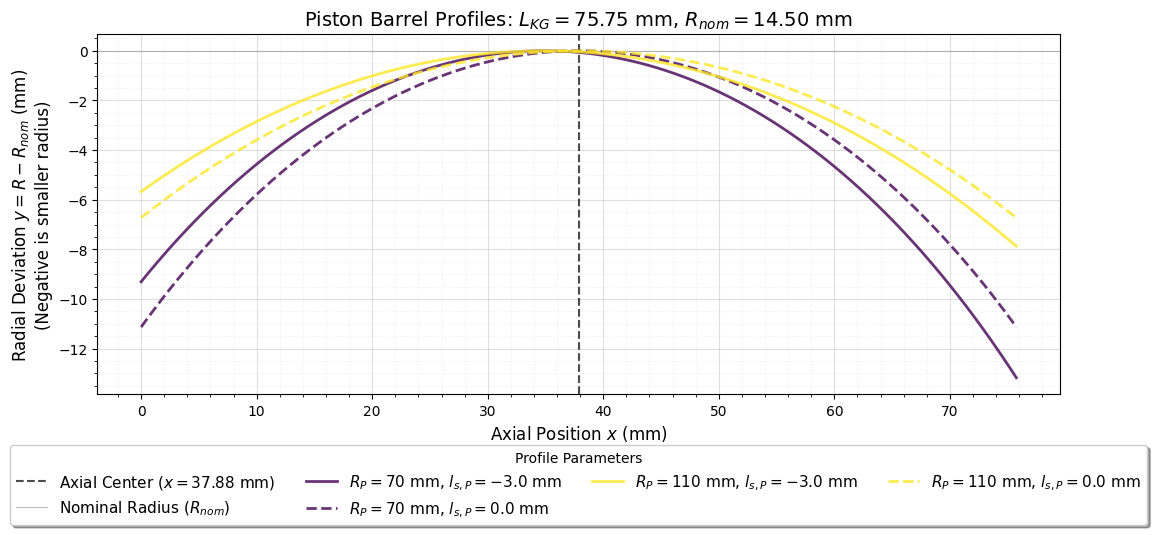

In [5]:
#!/usr/bin/env python3
"""Barrel piston profile - Wide Legend (Updated for single plot output, larger legend, and R_P/l_s_P styling)."""

import numpy as np
import matplotlib.pyplot as plt

def calculate_barrel_profile(R_P, l_s_P, l_KG, num_points=500):
    """
    Calculates the barrel profile (radial deviation) based on the spherical cap method.
    
    R_P (float): Radius of the spherical cap (mm).
    l_s_P (float): Axial offset of the peak from the mid-point (mm).
    l_KG (float): Total axial length (mm).
    """
    midpoint = l_KG / 2.0
    # Axial position of the peak of the barrel profile
    peak_x = midpoint + l_s_P

    # Absolute axial distance from the peak to the top (crown) and bottom (skirt) ends
    d_crown = np.abs(l_KG - peak_x)
    d_skirt = np.abs(0.0 - peak_x)

    max_d = max(d_crown, d_skirt)
    if R_P <= max_d:
        raise ValueError(f"R_P ({R_P:.1f}) must be > largest axial distance from peak ({max_d:.3f})")

    # Radial deviation at the crown end (x=l_KG)
    delta_C_P = R_P - np.sqrt(R_P**2 - d_crown**2)
    # Radial deviation at the skirt end (x=0.0)
    delta_DC_P = R_P - np.sqrt(R_P**2 - d_skirt**2)

    # Axial positions along the length
    x = np.linspace(0.0, l_KG, num_points)
    # Absolute axial distance from the peak for all points
    d = np.abs(x - peak_x)
    
    if np.any(d >= R_P):
        raise ValueError("Profile points exist outside the spherical cap. Check R_P.")
        
    # Radial deviation (delta) from the nominal radius at axial position x
    delta = R_P - np.sqrt(R_P**2 - d**2)
    
    # We plot the deviation *down* from the nominal radius (y is negative)
    y = -delta

    return x, y, delta_C_P, delta_DC_P, peak_x

def plot_all_profiles(data_list, R_nominal, l_KG, R_P_list, l_s_P_list):
    """
    Plots multiple barrel profiles on a single figure, using distinct colors for R_P
    and distinct line styles for l_s_P.
    
    data_list (list): List of dictionaries, each containing profile data.
    R_nominal (float): Nominal radius (for context).
    l_KG (float): Total axial length.
    R_P_list (tuple): List of R_P values used, for color mapping.
    l_s_P_list (tuple): List of l_s_P values used, for linestyle mapping.
    """
    fig, ax = plt.subplots(figsize=(12, 5))
    
    midpoint = l_KG / 2.0
    
    # --- Custom Styling Setup ---
    # Define a set of colors for R_P
    colors = plt.cm.get_cmap('viridis', len(R_P_list))
    
    # Define a set of line styles for l_s_P
    # Common styles: '-', '--', ':', '-.'
    styles = ['-', '--', ':', '-.'] 
    
    # Create mapping dictionaries
    R_P_to_color = {R_P: colors(i) for i, R_P in enumerate(R_P_list)}
    l_s_P_to_style = {l_s_P: styles[i % len(styles)] for i, l_s_P in enumerate(l_s_P_list)}
    
    # Reference Lines
    ax.axvline(midpoint, color='black', linestyle='--', linewidth=1.5, alpha=0.7, 
                label=f'Axial Center ($x={midpoint:.2f}$ mm)')
    ax.axhline(0, linestyle='-', color='gray', linewidth=0.8, alpha=0.5, label='Nominal Radius ($R_{{nom}}$)')

    # Plot each profile
    for data in data_list:
        Rp = data['R_P']
        lsp = data['l_s_P']
        x = data['x']
        y = data['y']
        
        # Get the color and linestyle based on the parameters
        line_color = R_P_to_color.get(Rp, 'black')
        line_style = l_s_P_to_style.get(lsp, '-')
        
        # Legend label 
        label = f'$R_P={Rp:.0f}$ mm, $l_{{s,P}}={lsp:.1f}$ mm'
        
        # Main Profile
        ax.plot(x, y, linewidth=2, label=label, alpha=0.8, color=line_color, linestyle=line_style)

    # Styling
    ax.set_xlabel('Axial Position $x$ (mm)', fontsize=12)
    ax.set_ylabel(f'Radial Deviation $y = R - R_{{nom}}$ (mm)\n(Negative is smaller radius)', fontsize=12)
    ax.set_title(f'Piston Barrel Profiles: $L_{{KG}}={l_KG:.2f}$ mm, $R_{{nom}}={R_nominal:.2f}$ mm', fontsize=14)
    
    ax.grid(True, which='major', linestyle='-', alpha=0.4)
    ax.minorticks_on()
    ax.grid(True, which='minor', linestyle=':', alpha=0.2)
    
    # --- Wide Legend Configuration (Font Size Increased to 11) ---
    # The legend will automatically show the color/linestyle mapping
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), 
              ncol=4, fontsize=11, frameon=True, fancybox=True, shadow=True, title="Profile Parameters")
    
    plt.tight_layout()
    # Adjust bottom margin to accommodate the new wider legend
    plt.subplots_adjust(bottom=0.20)
    
    plt.show()
    plt.close(fig)
    
def generate_profile_data(R_P, l_s_P, l_KG, num_points=500):
    """Calculates profile data and returns it in a dictionary."""
    try:
        x, y, dCP, dDCP, px = calculate_barrel_profile(R_P, l_s_P, l_KG, num_points)
        return {
            "R_P": R_P, 
            "l_s_P": l_s_P, 
            "x": x, 
            "y": y, 
            "delta_C_P": dCP, 
            "delta_DC_P": dDCP, 
            "peak_x": px
        }
    except ValueError as e:
        print(f"Skipping profile R_P={R_P:.0f}, l_s_P={l_s_P:.1f}: {e}")
        return None

if __name__ == "__main__":
    R_P_list = (70, 110)
    l_s_P_list = (-3, 0) 
    R_nominal = 29.0 / 2 
    l_KG = 75.753 

    all_profiles_data = []
    
    # Iterate through parameters and collect data
    for Rp in R_P_list:
        for lsp in l_s_P_list:
            data = generate_profile_data(Rp, lsp, l_KG)
            if data:
                all_profiles_data.append(data)
                
    # Plot all collected profiles on a single figure, passing the lists for mapping
    if all_profiles_data:
        plot_all_profiles(all_profiles_data, R_nominal, l_KG, R_P_list, l_s_P_list)
    else:
        print("No valid profiles were generated to plot.")

Generated: Top   4µm | Bot   4µm | Offset -6.0mm -> R_top: 242.6mm, R_bot: 129.0mm
Generated: Top   4µm | Bot   4µm | Offset  0.0mm -> R_top: 181.3mm, R_bot: 181.3mm
Generated: Top   4µm | Bot   8µm | Offset -6.0mm -> R_top: 242.6mm, R_bot: 67.5mm
Generated: Top   4µm | Bot   8µm | Offset  0.0mm -> R_top: 181.3mm, R_bot: 93.7mm


C:\Users\RReddy\AppData\Local\Temp\ipykernel_23196\1504421582.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_tops))


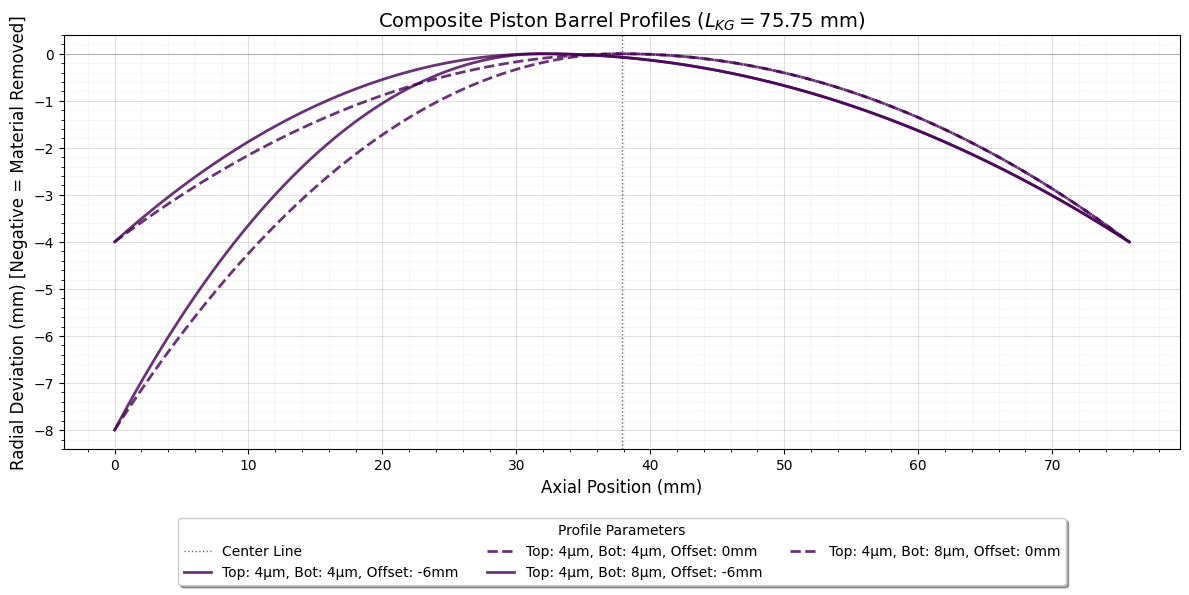

In [6]:
#!/usr/bin/env python3
"""
Composite Barrel Piston Profile - Batch Processing
Generates profiles based on lists of material removal parameters.
"""

import numpy as np
import matplotlib.pyplot as plt

def calculate_composite_profile(delta_top, delta_bot, l_s_P, l_KG, num_points=500):
    """
    Calculates a composite barrel profile.
    
    delta_top (float): Material removed at top (mm).
    delta_bot (float): Material removed at bottom (mm).
    l_s_P (float): Axial offset of peak (mm).
    l_KG (float): Total axial length (mm).
    """
    midpoint = l_KG / 2.0
    peak_x = midpoint + l_s_P

    d_crown = np.abs(l_KG - peak_x) 
    d_skirt = np.abs(0.0 - peak_x)

    # --- Top Arc Calculation ---
    if delta_top > 1e-9:
        R_top = (d_crown**2 + delta_top**2) / (2 * delta_top)
    else:
        R_top = np.inf 

    # --- Bottom Arc Calculation ---
    if delta_bot > 1e-9:
        R_bot = (d_skirt**2 + delta_bot**2) / (2 * delta_bot)
    else:
        R_bot = np.inf

    x = np.linspace(0.0, l_KG, num_points)
    y = np.zeros_like(x)
    
    for i, xi in enumerate(x):
        d = np.abs(xi - peak_x)
        
        if xi >= peak_x:
            # Top Arc
            if np.isinf(R_top):
                y[i] = 0.0
            else:
                y[i] = -(R_top - np.sqrt(R_top**2 - d**2))
        else:
            # Bottom Arc
            if np.isinf(R_bot):
                y[i] = 0.0
            else:
                y[i] = -(R_bot - np.sqrt(R_bot**2 - d**2))

    return {
        "x": x, "y": y, "peak_x": peak_x,
        "R_top": R_top, "R_bot": R_bot,
        "delta_top": delta_top, "delta_bot": delta_bot, "l_s_P": l_s_P
    }

def plot_batch_profiles(data_list, l_KG, unique_tops, unique_lsps):
    """
    Plots multiple profiles.
    Colors mapped to delta_top.
    Line styles mapped to l_s_P.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    midpoint = l_KG / 2.0
    
    # --- Styling Setup ---
    # Map delta_top to Colors
    colors = plt.cm.get_cmap('viridis', len(unique_tops))
    top_to_color = {val: colors(i) for i, val in enumerate(unique_tops)}
    
    # Map l_s_P to Line Styles
    style_opts = ['-', '--', '-.', ':']
    lsp_to_style = {val: style_opts[i % len(style_opts)] for i, val in enumerate(unique_lsps)}

    # Reference Lines
    ax.axvline(midpoint, color='black', linestyle=':', linewidth=1, alpha=0.6, label='Center Line')
    ax.axhline(0, color='gray', linewidth=0.8, alpha=0.5)

    # Plot Loop
    for data in data_list:
        x = data['x']
        y = data['y']
        d_top = data['delta_top']
        d_bot = data['delta_bot']
        lsp = data['l_s_P']
        
        # Determine Style
        c = top_to_color.get(d_top, 'black')
        s = lsp_to_style.get(lsp, '-')
        
        # Create Label (converting mm to microns for readability)
        # T = Top drop, B = Bottom drop, P = Peak offset
        label = (f"Top: {d_top:.0f}µm, Bot: {d_bot:.0f}µm, Offset: {lsp}mm")
        
        ax.plot(x, y, label=label, color=c, linestyle=s, linewidth=2, alpha=0.8)

    # Labels and Grid
    ax.set_xlabel('Axial Position (mm)', fontsize=12)
    ax.set_ylabel('Radial Deviation (mm) [Negative = Material Removed]', fontsize=12)
    ax.set_title(f'Composite Piston Barrel Profiles ($L_{{KG}}={l_KG:.2f}$ mm)', fontsize=14)
    
    ax.grid(True, which='major', alpha=0.4)
    ax.minorticks_on()
    ax.grid(True, which='minor', alpha=0.1)

    # Legend Configuration
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
              ncol=3, fontsize=10, frameon=True, fancybox=True, shadow=True, title="Profile Parameters")
    
    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # --- INPUT PARAMETERS (LISTS) ---
    l_KG = 75.753 

    # 1. List of Top Material Removal values (mm)
    # Example: 0.004 is 4 microns, 0.010 is 10 microns
    delta_top_list = (4,) 

    # 2. List of Bottom Material Removal values (mm)
    # If you want symmetric profiles, keep this list matching top, or just one value
    delta_bot_list = (4, 8,) 

    # 3. List of Peak Offsets (mm)
    # 0 is center, negative is towards skirt, positive towards crown
    l_s_P_list = (-6, 0)

    # --- PROCESSING ---
    all_profiles = []
    
    # Nested loops to generate every combination
    for d_top in delta_top_list:
        for d_bot in delta_bot_list:
            for lsp in l_s_P_list:
                
                data = calculate_composite_profile(d_top, d_bot, lsp, l_KG)
                all_profiles.append(data)
                
                # Print calculation stats to console
                print(f"Generated: Top {d_top:3.0f}µm | Bot {d_bot:3.0f}µm | Offset {lsp:4.1f}mm "
                      f"-> R_top: {data['R_top']:.1f}mm, R_bot: {data['R_bot']:.1f}mm")

    # --- PLOTTING ---
    if all_profiles:
        # We pass the unique lists to the plotter to help it assign colors/styles consistently
        plot_batch_profiles(all_profiles, l_KG, delta_top_list, l_s_P_list)

Saved: lsp_-10_DC2_case2.txt
Generated: Top   2µm | Bot   2µm | Offset -10.0mm -> R_top: 574.0mm, R_bot: 195.3mm
Saved: lsp_-7.5_DC2_case2.txt
Generated: Top   2µm | Bot   2µm | Offset -7.5mm -> R_top: 515.8mm, R_bot: 231.7mm
Saved: lsp_-5_DC2_case2.txt
Generated: Top   2µm | Bot   2µm | Offset -5.0mm -> R_top: 460.6mm, R_bot: 271.2mm
Saved: lsp_-2.5_DC2_case2.txt
Generated: Top   2µm | Bot   2µm | Offset -2.5mm -> R_top: 408.6mm, R_bot: 313.9mm
Saved: lsp_0_DC2_case2.txt
Generated: Top   2µm | Bot   2µm | Offset  0.0mm -> R_top: 359.7mm, R_bot: 359.7mm
Saved: lsp_2.5_DC2_case2.txt
Generated: Top   2µm | Bot   2µm | Offset  2.5mm -> R_top: 313.9mm, R_bot: 408.6mm
Saved: lsp_5_DC2_case2.txt
Generated: Top   2µm | Bot   2µm | Offset  5.0mm -> R_top: 271.2mm, R_bot: 460.6mm
Saved: lsp_7.5_DC2_case2.txt
Generated: Top   2µm | Bot   2µm | Offset  7.5mm -> R_top: 231.7mm, R_bot: 515.8mm
Saved: lsp_10_DC2_case2.txt
Generated: Top   2µm | Bot   2µm | Offset 10.0mm -> R_top: 195.3mm, R_bot: 574

C:\Users\RReddy\AppData\Local\Temp\ipykernel_27540\2764376200.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_tops))
C:\Users\RReddy\AppData\Local\Temp\ipykernel_27540\2764376200.py:135: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


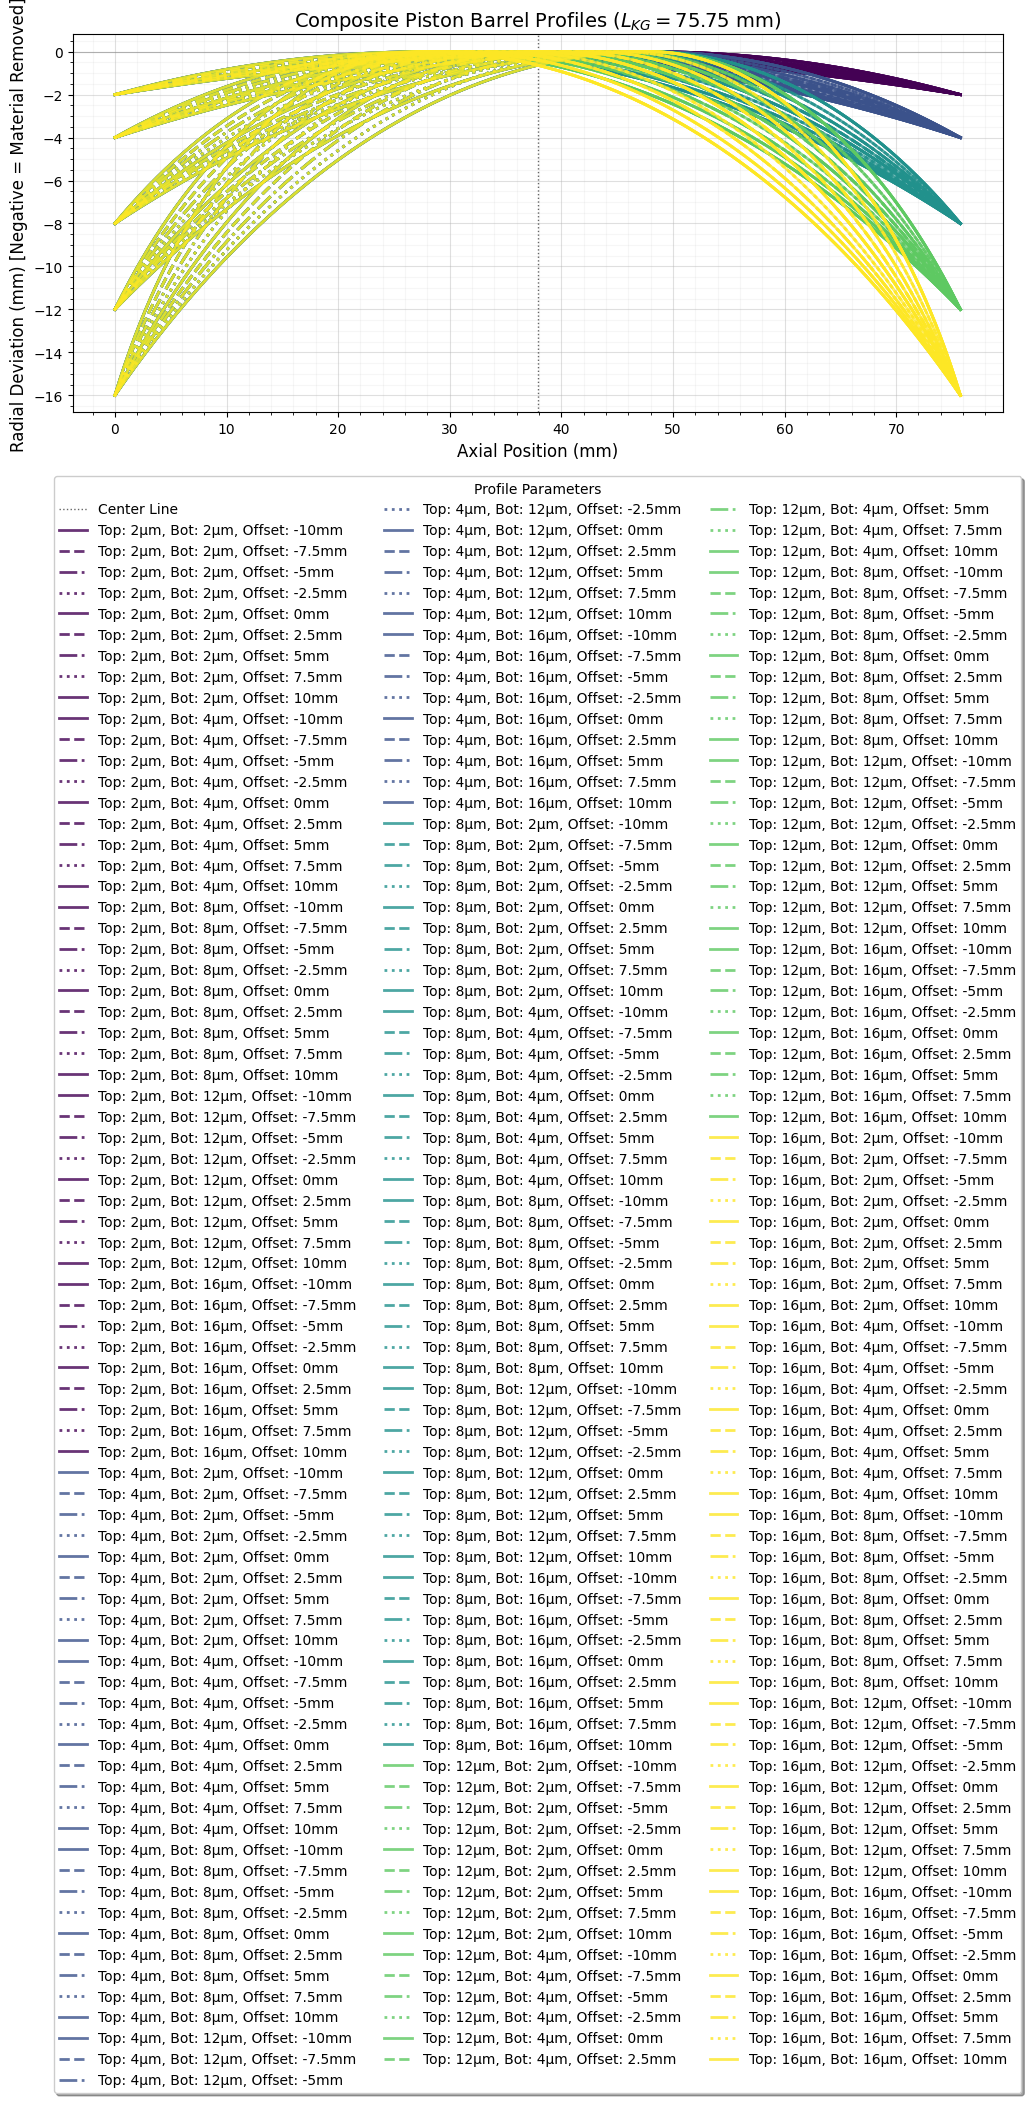

In [2]:
#!/usr/bin/env python3

"""
Composite Barrel Piston Profile - Batch Processing with TXT Export
Generates profiles and saves each to a .txt file.
"""

import os
import numpy as np
import matplotlib.pyplot as plt

SCRIPT_DIR = os.getcwd()


def calculate_composite_profile(delta_top, delta_bot, l_s_P, l_KG, num_points=500):
    """
    Calculates a composite barrel profile.
    
    delta_top (float): Material removed at top (mm).
    delta_bot (float): Material removed at bottom (mm).
    l_s_P (float): Axial offset of peak (mm).
    l_KG (float): Total axial length (mm).
    """
    midpoint = l_KG / 2.0
    peak_x = midpoint + l_s_P

    d_crown = np.abs(l_KG - peak_x) 
    d_skirt = np.abs(0.0 - peak_x)

    # --- Top Arc Calculation ---
    if delta_top > 1e-9:
        R_top = (d_crown**2 + delta_top**2) / (2 * delta_top)
    else:
        R_top = np.inf 

    # --- Bottom Arc Calculation ---
    if delta_bot > 1e-9:
        R_bot = (d_skirt**2 + delta_bot**2) / (2 * delta_bot)
    else:
        R_bot = np.inf

    x = np.linspace(0.0, l_KG, num_points)
    y = np.zeros_like(x)
    
    for i, xi in enumerate(x):
        d = np.abs(xi - peak_x)
        
        if xi >= peak_x:
            # Top Arc
            if np.isinf(R_top):
                y[i] = 0.0
            else:
                y[i] = -(R_top - np.sqrt(R_top**2 - d**2))
        else:
            # Bottom Arc
            if np.isinf(R_bot):
                y[i] = 0.0
            else:
                y[i] = -(R_bot - np.sqrt(R_bot**2 - d**2))

    return {
        "x": x, "y": y, "peak_x": peak_x,
        "R_top": R_top, "R_bot": R_bot,
        "delta_top": delta_top, "delta_bot": delta_bot, "l_s_P": l_s_P
    }


def save_profile_txt(data, filename):
    """
    Saves profile data to a .txt file in the same format as the first script.
    Format: two columns (x, y) tab-delimited, 6 decimal places.
    """
    filepath = os.path.join(SCRIPT_DIR, filename)
    x = data['x']
    y = data['y']
    np.savetxt(filepath, np.column_stack([x, y]), fmt="%.6f", delimiter="\t")
    print(f"Saved: {filename}")


def plot_batch_profiles(data_list, l_KG, unique_tops, unique_lsps):
    """
    Plots multiple profiles.
    Colors mapped to delta_top.
    Line styles mapped to l_s_P.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    midpoint = l_KG / 2.0
    
    # --- Styling Setup ---
    # Map delta_top to Colors
    colors = plt.cm.get_cmap('viridis', len(unique_tops))
    top_to_color = {val: colors(i) for i, val in enumerate(unique_tops)}
    
    # Map l_s_P to Line Styles
    style_opts = ['-', '--', '-.', ':']
    lsp_to_style = {val: style_opts[i % len(style_opts)] for i, val in enumerate(unique_lsps)}

    # Reference Lines
    ax.axvline(midpoint, color='black', linestyle=':', linewidth=1, alpha=0.6, label='Center Line')
    ax.axhline(0, color='gray', linewidth=0.8, alpha=0.5)

    # Plot Loop
    for data in data_list:
        x = data['x']
        y = data['y']
        d_top = data['delta_top']
        d_bot = data['delta_bot']
        lsp = data['l_s_P']
        
        # Determine Style
        c = top_to_color.get(d_top, 'black')
        s = lsp_to_style.get(lsp, '-')
        
        # Create Label (converting mm to microns for readability)
        # T = Top drop, B = Bottom drop, P = Peak offset
        label = (f"Top: {d_top:.0f}µm, Bot: {d_bot:.0f}µm, Offset: {lsp}mm")
        
        ax.plot(x, y, label=label, color=c, linestyle=s, linewidth=2, alpha=0.8)

    # Labels and Grid
    ax.set_xlabel('Axial Position (mm)', fontsize=12)
    ax.set_ylabel('Radial Deviation (mm) [Negative = Material Removed]', fontsize=12)
    ax.set_title(f'Composite Piston Barrel Profiles ($L_{{KG}}={l_KG:.2f}$ mm)', fontsize=14)
    
    ax.grid(True, which='major', alpha=0.4)
    ax.minorticks_on()
    ax.grid(True, which='minor', alpha=0.1)

    # Legend Configuration
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
              ncol=3, fontsize=10, frameon=True, fancybox=True, shadow=True, title="Profile Parameters")
    
    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # --- INPUT PARAMETERS (LISTS) ---
    l_KG = 75.753 

    # 1. List of Top Material Removal values (mm)
    # Example: 0.004 is 4 microns, 0.010 is 10 microns
    delta_top_list = (2, 4, 8, 12, 16) 

    # 2. List of Bottom Material Removal values (mm)
    # If you want symmetric profiles, keep this list matching top, or just one value
    delta_bot_list = (2, 4, 8, 12, 16)

    # 3. List of Peak Offsets (mm)
    # 0 is center, negative is towards skirt, positive towards crown
    l_s_P_list = (-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10)

    # --- PROCESSING ---
    all_profiles = []
    
    # Nested loops to generate every combination
    for d_top in delta_top_list:
        for d_bot in delta_bot_list:
            for lsp in l_s_P_list:
                
                data = calculate_composite_profile(d_top, d_bot, lsp, l_KG)
                all_profiles.append(data)
                
                # Generate filename: lsp_value_case_botvalue_dc_topvalue.txt
                # Example: lsp_-10_case_bot8_dc_top4.txt
                filename = f"lsp_{lsp}_DC{d_bot}_case{d_top}.txt"
                save_profile_txt(data, filename)
                
                # Print calculation stats to console
                print(f"Generated: Top {d_top:3.0f}µm | Bot {d_bot:3.0f}µm | Offset {lsp:4.1f}mm "
                      f"-> R_top: {data['R_top']:.1f}mm, R_bot: {data['R_bot']:.1f}mm")

    # --- PLOTTING ---
    if all_profiles:
        # We pass the unique lists to the plotter to help it assign colors/styles consistently
        plot_batch_profiles(all_profiles, l_KG, delta_top_list, l_s_P_list)

Excluding 180 combinations from first study...

Saved: lsp_-10_DC4_case20.txt
Generated: Top 20µm | Bot 4µm | Offset -10mm
Saved: lsp_-7.5_DC4_case20.txt
Generated: Top 20µm | Bot 4µm | Offset -7.5mm
Saved: lsp_-5_DC4_case20.txt
Generated: Top 20µm | Bot 4µm | Offset -5mm
Saved: lsp_-2.5_DC4_case20.txt
Generated: Top 20µm | Bot 4µm | Offset -2.5mm
Saved: lsp_0_DC4_case20.txt
Generated: Top 20µm | Bot 4µm | Offset 0mm
Saved: lsp_2.5_DC4_case20.txt
Generated: Top 20µm | Bot 4µm | Offset 2.5mm
Saved: lsp_5_DC4_case20.txt
Generated: Top 20µm | Bot 4µm | Offset 5mm
Saved: lsp_7.5_DC4_case20.txt
Generated: Top 20µm | Bot 4µm | Offset 7.5mm
Saved: lsp_10_DC4_case20.txt
Generated: Top 20µm | Bot 4µm | Offset 10mm
Saved: lsp_-10_DC8_case20.txt
Generated: Top 20µm | Bot 8µm | Offset -10mm
Saved: lsp_-7.5_DC8_case20.txt
Generated: Top 20µm | Bot 8µm | Offset -7.5mm
Saved: lsp_-5_DC8_case20.txt
Generated: Top 20µm | Bot 8µm | Offset -5mm
Saved: lsp_-2.5_DC8_case20.txt
Generated: Top 20µm | Bot 8µm

C:\Users\RReddy\AppData\Local\Temp\ipykernel_38492\1464726312.py:82: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_tops))
C:\Users\RReddy\AppData\Local\Temp\ipykernel_38492\1464726312.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


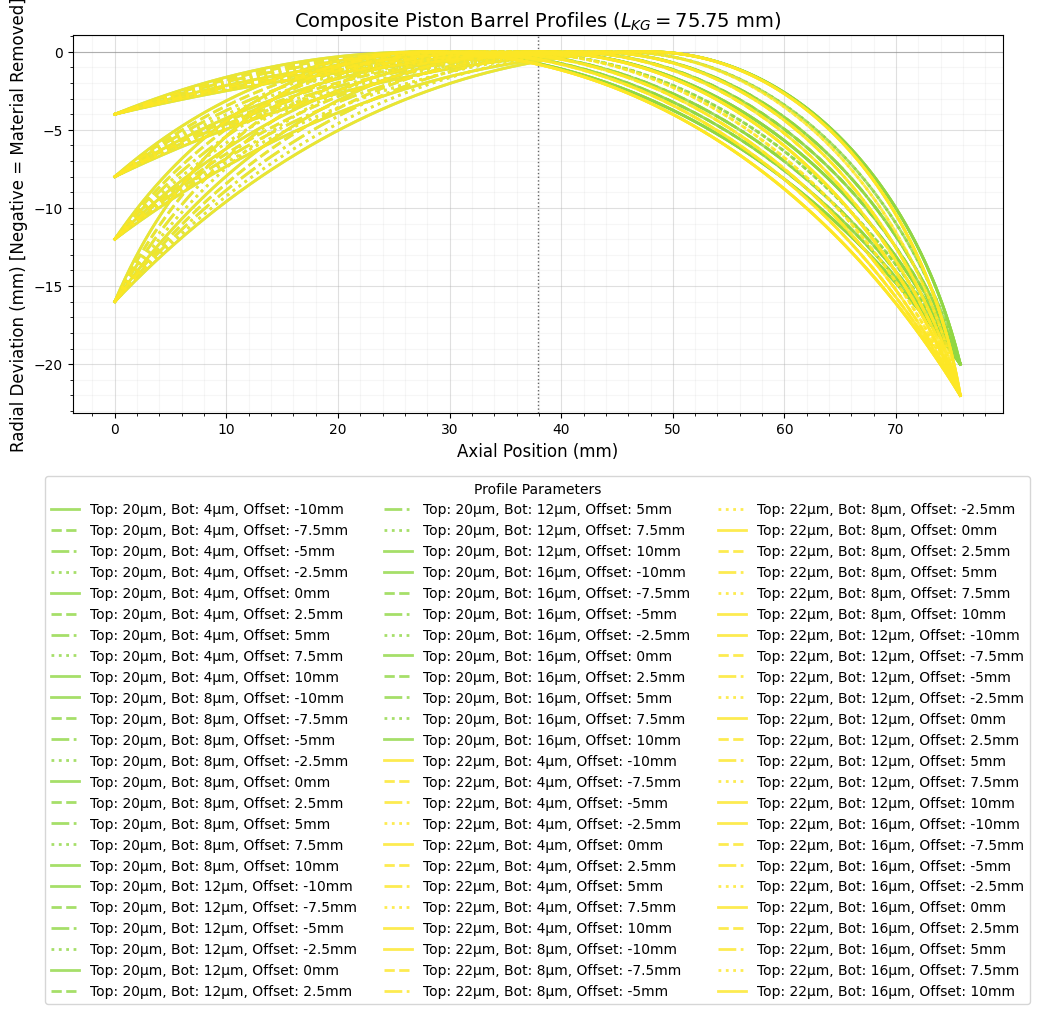

In [1]:
#!/usr/bin/env python3

"""
Composite Barrel Piston Profile - Batch Processing with TXT Export
Generates profiles and saves each to a .txt file.
"""

import os
import numpy as np
import matplotlib.pyplot as plt

SCRIPT_DIR = os.getcwd()


def calculate_composite_profile(delta_top, delta_bot, l_s_P, l_KG, num_points=500):
    """
    Calculates a composite barrel profile.
    """
    midpoint = l_KG / 2.0
    peak_x = midpoint + l_s_P

    d_crown = np.abs(l_KG - peak_x)
    d_skirt = np.abs(0.0 - peak_x)

    # --- Top Arc ---
    if delta_top > 1e-9:
        R_top = (d_crown**2 + delta_top**2) / (2 * delta_top)
    else:
        R_top = np.inf

    # --- Bottom Arc ---
    if delta_bot > 1e-9:
        R_bot = (d_skirt**2 + delta_bot**2) / (2 * delta_bot)
    else:
        R_bot = np.inf

    x = np.linspace(0.0, l_KG, num_points)
    y = np.zeros_like(x)

    for i, xi in enumerate(x):
        d = np.abs(xi - peak_x)
        if xi >= peak_x:
            # Top arc
            if np.isinf(R_top):
                y[i] = 0.0
            else:
                y[i] = -(R_top - np.sqrt(R_top**2 - d**2))
        else:
            # Bottom arc
            if np.isinf(R_bot):
                y[i] = 0.0
            else:
                y[i] = -(R_bot - np.sqrt(R_bot**2 - d**2))

    return {
        "x": x, "y": y, "peak_x": peak_x,
        "R_top": R_top, "R_bot": R_bot,
        "delta_top": delta_top, "delta_bot": delta_bot, "l_s_P": l_s_P
    }


def save_profile_txt(data, filename):
    """
    Saves profile data to a .txt file.
    """
    filepath = os.path.join(SCRIPT_DIR, filename)
    x = data['x']
    y = data['y']
    np.savetxt(filepath, np.column_stack([x, y]), fmt="%.6f", delimiter="\t")
    print(f"Saved: {filename}")


def plot_batch_profiles(data_list, l_KG, unique_tops, unique_lsps):
    """
    Plots multiple profiles.
    """
    fig, ax = plt.subplots(figsize=(12, 6))

    midpoint = l_KG / 2.0

    # Color mapping for delta_top
    colors = plt.cm.get_cmap('viridis', len(unique_tops))
    top_to_color = {v: colors(i) for i, v in enumerate(unique_tops)}

    # Line style mapping for l_s_P
    style_opts = ['-', '--', '-.', ':']
    lsp_to_style = {v: style_opts[i % len(style_opts)] for i, v in enumerate(unique_lsps)}

    # Reference lines
    ax.axvline(midpoint, color='black', linestyle=':', linewidth=1, alpha=0.6)
    ax.axhline(0, color='gray', linewidth=0.8, alpha=0.5)

    for data in data_list:
        x = data['x']
        y = data['y']
        d_top = data['delta_top']
        d_bot = data['delta_bot']
        lsp = data['l_s_P']

        color = top_to_color.get(d_top, 'black')
        style = lsp_to_style.get(lsp, '-')

        label = f"Top: {d_top:.0f}µm, Bot: {d_bot:.0f}µm, Offset: {lsp}mm"
        ax.plot(x, y, label=label, color=color, linestyle=style, linewidth=2, alpha=0.8)

    ax.set_xlabel('Axial Position (mm)', fontsize=12)
    ax.set_ylabel('Radial Deviation (mm) [Negative = Material Removed]', fontsize=12)
    ax.set_title(f'Composite Piston Barrel Profiles ($L_{{KG}}={l_KG:.2f}$ mm)', fontsize=14)

    ax.grid(True, which='major', alpha=0.4)
    ax.minorticks_on()
    ax.grid(True, which='minor', alpha=0.1)

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
              ncol=3, fontsize=10, frameon=True, title="Profile Parameters")

    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":

    l_KG = 75.753

    # -------------------------------
    # FIRST STUDY PARAMETERS (TO EXCLUDE)
    # -------------------------------
    delta_top_first = (4, 8, 12, 14, 18)
    delta_bot_first = (4, 8, 12, 16)
    l_s_P_first     = (-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10)

    excluded_combos = {
        (dt, db, lsp)
        for dt in delta_top_first
        for db in delta_bot_first
        for lsp in l_s_P_first
    }

    print(f"Excluding {len(excluded_combos)} combinations from first study...\n")

    # -------------------------------
    # SECOND STUDY PARAMETERS
    # -------------------------------
    delta_top_list = (4, 8, 12, 14, 18, 20, 22)
    delta_bot_list = (4, 8, 12, 16)
    l_s_P_list = (-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10)

    all_profiles = []
    skipped = 0
    processed = 0

    # -------------------------------
    # PROCESSING LOOP
    # -------------------------------
    for d_top in delta_top_list:
        for d_bot in delta_bot_list:
            for lsp in l_s_P_list:

                # Skip first-study combinations
                if (d_top, d_bot, lsp) in excluded_combos:
                    skipped += 1
                    continue

                processed += 1

                data = calculate_composite_profile(d_top, d_bot, lsp, l_KG)
                all_profiles.append(data)

                filename = f"lsp_{lsp}_DC{d_bot}_case{d_top}.txt"
                save_profile_txt(data, filename)

                print(f"Generated: Top {d_top}µm | Bot {d_bot}µm | Offset {lsp}mm")

    print(f"\nProcessed: {processed} profiles")
    print(f"Skipped (from first study): {skipped}")

    # -------------------------------
    # PLOTTING
    # -------------------------------
    if all_profiles:
        plot_batch_profiles(all_profiles, l_KG, delta_top_list, l_s_P_list)



Successfully processed: 72 profiles
Exported: folder_names_list.txt and file_paths_list.txt


C:\Users\RReddy\AppData\Local\Temp\ipykernel_38492\17282897.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_tops))
C:\Users\RReddy\AppData\Local\Temp\ipykernel_38492\17282897.py:88: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


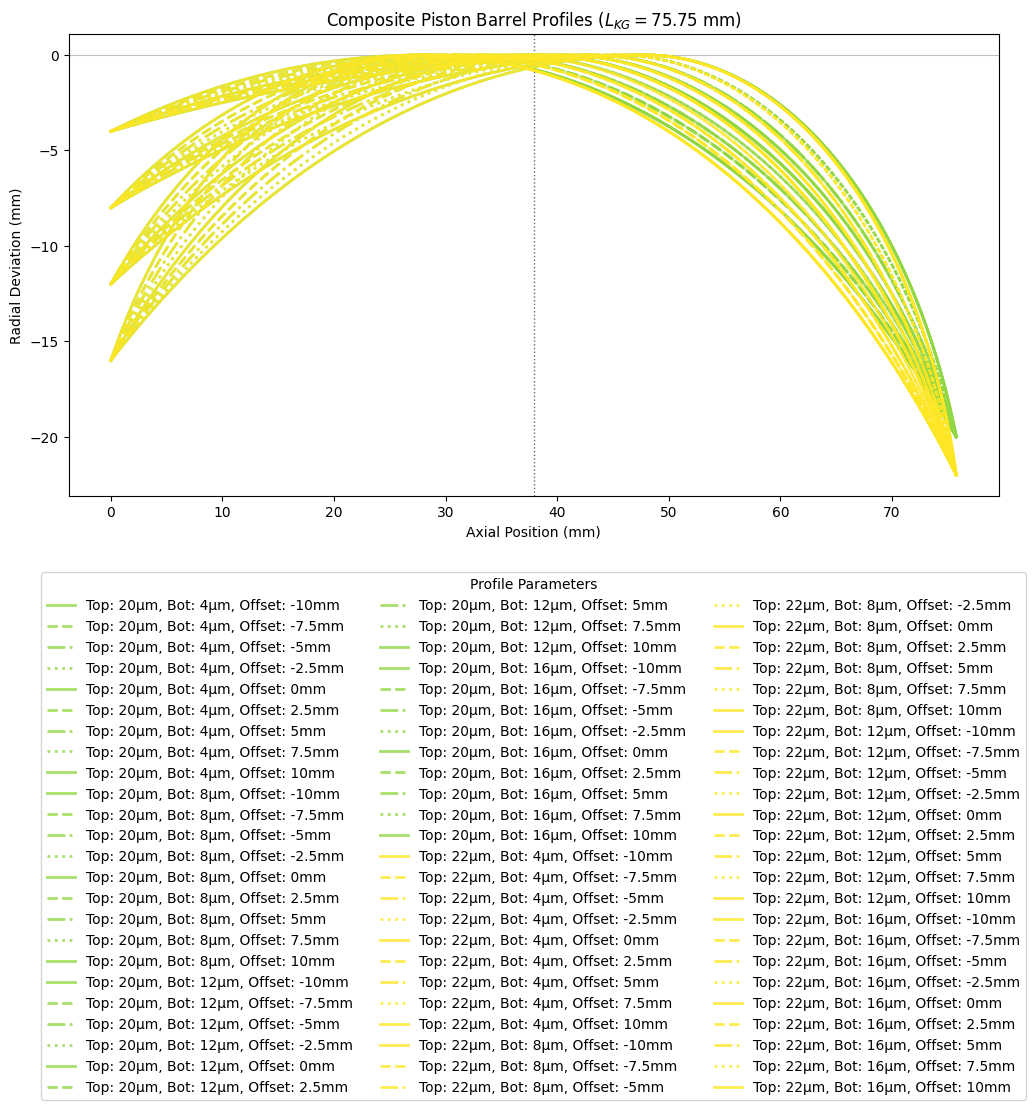

In [2]:
#!/usr/bin/env python3

"""
Composite Barrel Piston Profile - Batch Processing with TXT Export
Generates profiles and saves each to a .txt file, plus summary lists.
"""

import os
import numpy as np
import matplotlib.pyplot as plt

SCRIPT_DIR = os.getcwd()

def calculate_composite_profile(delta_top, delta_bot, l_s_P, l_KG, num_points=500):
    """
    Calculates a composite barrel profile.
    """
    midpoint = l_KG / 2.0
    peak_x = midpoint + l_s_P

    d_crown = np.abs(l_KG - peak_x)
    d_skirt = np.abs(0.0 - peak_x)

    # --- Top Arc ---
    if delta_top > 1e-9:
        R_top = (d_crown**2 + delta_top**2) / (2 * delta_top)
    else:
        R_top = np.inf

    # --- Bottom Arc ---
    if delta_bot > 1e-9:
        R_bot = (d_skirt**2 + delta_bot**2) / (2 * delta_bot)
    else:
        R_bot = np.inf

    x = np.linspace(0.0, l_KG, num_points)
    y = np.zeros_like(x)

    for i, xi in enumerate(x):
        d = np.abs(xi - peak_x)
        if xi >= peak_x:
            if np.isinf(R_top):
                y[i] = 0.0
            else:
                y[i] = -(R_top - np.sqrt(R_top**2 - d**2))
        else:
            if np.isinf(R_bot):
                y[i] = 0.0
            else:
                y[i] = -(R_bot - np.sqrt(R_bot**2 - d**2))

    return {
        "x": x, "y": y, "peak_x": peak_x,
        "R_top": R_top, "R_bot": R_bot,
        "delta_top": delta_top, "delta_bot": delta_bot, "l_s_P": l_s_P
    }

def save_profile_txt(data, filename):
    filepath = os.path.join(SCRIPT_DIR, filename)
    x = data['x']
    y = data['y']
    np.savetxt(filepath, np.column_stack([x, y]), fmt="%.6f", delimiter="\t")
    # print(f"Saved: {filename}")

def plot_batch_profiles(data_list, l_KG, unique_tops, unique_lsps):
    fig, ax = plt.subplots(figsize=(12, 6))
    midpoint = l_KG / 2.0
    colors = plt.cm.get_cmap('viridis', len(unique_tops))
    top_to_color = {v: colors(i) for i, v in enumerate(unique_tops)}
    style_opts = ['-', '--', '-.', ':']
    lsp_to_style = {v: style_opts[i % len(style_opts)] for i, v in enumerate(unique_lsps)}

    ax.axvline(midpoint, color='black', linestyle=':', linewidth=1, alpha=0.6)
    ax.axhline(0, color='gray', linewidth=0.8, alpha=0.5)

    for data in data_list:
        x, y = data['x'], data['y']
        d_top, d_bot, lsp = data['delta_top'], data['delta_bot'], data['l_s_P']
        color = top_to_color.get(d_top, 'black')
        style = lsp_to_style.get(lsp, '-')
        label = f"Top: {d_top:.0f}µm, Bot: {d_bot:.0f}µm, Offset: {lsp}mm"
        ax.plot(x, y, label=label, color=color, linestyle=style, linewidth=2, alpha=0.8)

    ax.set_xlabel('Axial Position (mm)')
    ax.set_ylabel('Radial Deviation (mm)')
    ax.set_title(f'Composite Piston Barrel Profiles ($L_{{KG}}={l_KG:.2f}$ mm)')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, title="Profile Parameters")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    l_KG = 75.753

    # Study Parameters
    delta_top_first = (4, 8, 12, 14, 18)
    delta_bot_first = (4, 8, 12, 16)
    l_s_P_first     = (-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10)

    excluded_combos = {(dt, db, lsp) for dt in delta_top_first for db in delta_bot_first for lsp in l_s_P_first}

    delta_top_list = (4, 8, 12, 14, 18, 20, 22)
    delta_bot_list = (4, 8, 12, 16)
    l_s_P_list = (-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10)

    all_profiles = []
    # --- NEW LISTS FOR EXPORT ---
    folder_names = []
    file_paths = []
    processed = 0

    for d_top in delta_top_list:
        for d_bot in delta_bot_list:
            for lsp in l_s_P_list:
                
                if (d_top, d_bot, lsp) in excluded_combos:
                    continue

                processed += 1
                data = calculate_composite_profile(d_top, d_bot, lsp, l_KG)
                all_profiles.append(data)

                # 1. Base filename
                core_name = f"lsp_{lsp}_DC{d_bot}_case{d_top}"
                
                # 2. Generate the Folder Name entry (from Image 1)
                folder_entry = f"T60_2850rpm_350bar_100d_{core_name}"
                folder_names.append(folder_entry)
                
                # 3. Generate the File Path entry (from Image 2)
                path_entry = f"./input/{core_name}.txt"
                file_paths.append(path_entry)

                # 4. Save the actual profile data
                save_profile_txt(data, f"{core_name}.txt")

    # --- SAVE THE NEW SUMMARY FILES ---
    with open("folder_names_list.txt", "w") as f_out:
        f_out.write("\n".join(folder_names))
    
    with open("file_paths_list.txt", "w") as p_out:
        p_out.write("\n".join(file_paths))

    print(f"\nSuccessfully processed: {processed} profiles")
    print(f"Exported: folder_names_list.txt and file_paths_list.txt")

    if all_profiles:
        plot_batch_profiles(all_profiles, l_KG, delta_top_list, l_s_P_list)